In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
stores = pd.read_csv(r"..\Data\01_raw\stores.csv")
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
stores.shape

(54, 5)

In [7]:
output = []

for column in stores.columns:

    null_values  = np.sum(pd.isna(stores[column]))
    unique = stores[column].nunique()
    column_data_type = stores[column].dtype

    output.append([column, null_values, unique, column_data_type])

output_df = pd.DataFrame(output, columns = ['column','null values', 'unique', 'datatype'])

describe_df = stores.describe().transpose() 
combine_df = pd.concat([ output_df.set_index('column'), describe_df], axis = 1, join='outer')

combine_df

,null values,unique,datatype,count,mean,std,min,25%,50%,75%,max
store_nbr,0,54,int64,54.0,27.500000,15.732133,1.0,14.25,27.5,40.75,54.0
city,0,22,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,0,16,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,0,5,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster,0,17,int64,54.0,8.481481,4.693395,1.0,4.00,8.5,13.00,17.0


In [8]:
stores.drop_duplicates(inplace=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'Quito'),
  Text(1, 0, 'Santo Domingo'),
  Text(2, 0, 'Cayambe'),
  Text(3, 0, 'Latacunga'),
  Text(4, 0, 'Riobamba'),
  Text(5, 0, 'Ibarra'),
  Text(6, 0, 'Guaranda'),
  Text(7, 0, 'Puyo'),
  Text(8, 0, 'Ambato'),
  Text(9, 0, 'Guayaquil'),
  Text(10, 0, 'Salinas'),
  Text(11, 0, 'Daule'),
  Text(12, 0, 'Babahoyo'),
  Text(13, 0, 'Quevedo'),
  Text(14, 0, 'Playas'),
  Text(15, 0, 'Libertad'),
  Text(16, 0, 'Cuenca'),
  Text(17, 0, 'Loja'),
  Text(18, 0, 'Machala'),
  Text(19, 0, 'Esmeraldas'),
  Text(20, 0, 'Manta'),
  Text(21, 0, 'El Carmen')])

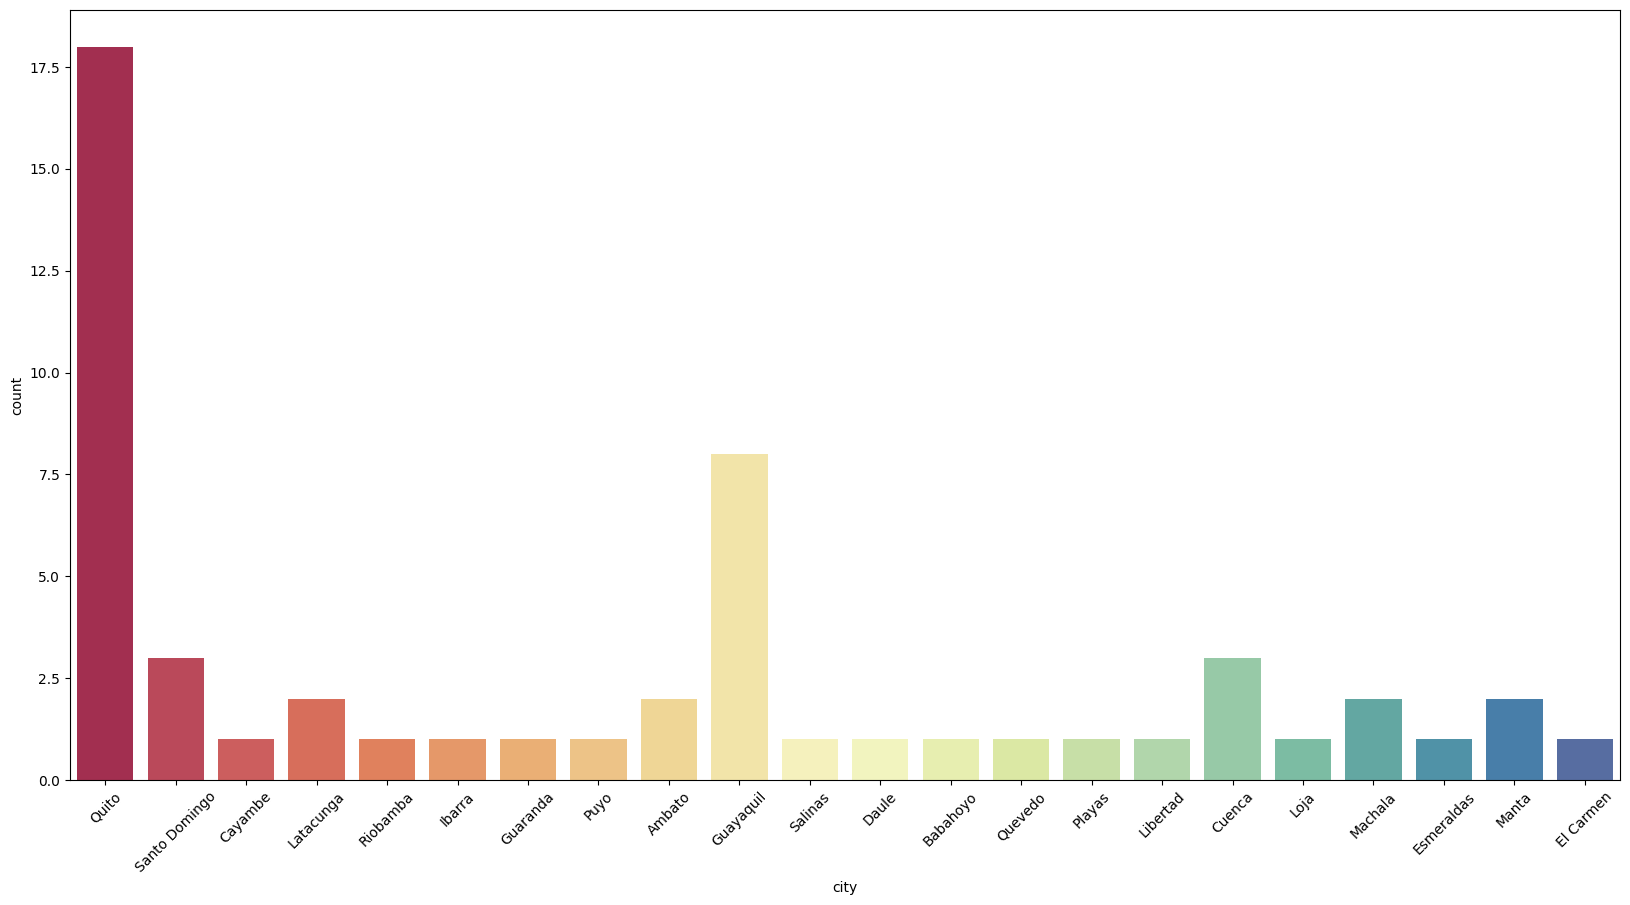

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(data= stores, x='city', hue ='city', palette='Spectral')
plt.xticks(rotation = 45)

Quito has maximum number of stores followed by Guayaquil.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Pichincha'),
  Text(1, 0, 'Santo Domingo de los Tsachilas'),
  Text(2, 0, 'Cotopaxi'),
  Text(3, 0, 'Chimborazo'),
  Text(4, 0, 'Imbabura'),
  Text(5, 0, 'Bolivar'),
  Text(6, 0, 'Pastaza'),
  Text(7, 0, 'Tungurahua'),
  Text(8, 0, 'Guayas'),
  Text(9, 0, 'Santa Elena'),
  Text(10, 0, 'Los Rios'),
  Text(11, 0, 'Azuay'),
  Text(12, 0, 'Loja'),
  Text(13, 0, 'El Oro'),
  Text(14, 0, 'Esmeraldas'),
  Text(15, 0, 'Manabi')])

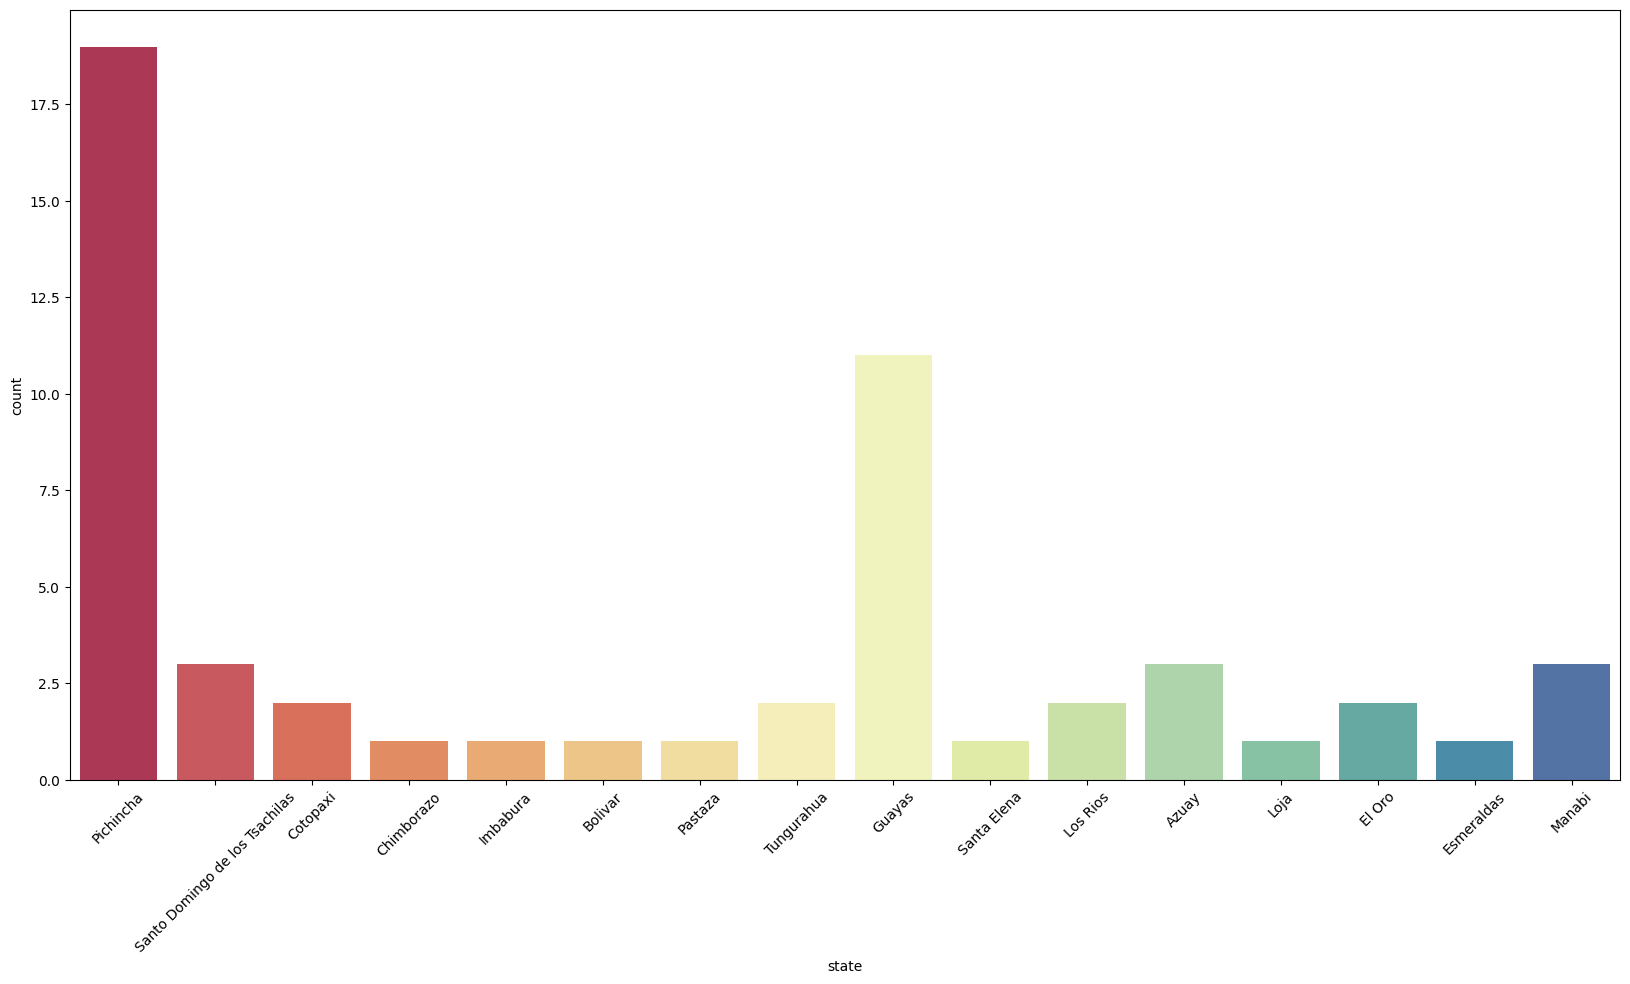

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(data= stores, x='state', hue ='state', palette='Spectral')
plt.xticks(rotation = 45)

Pichincha has maximum number of stores that to in city of in Quito followed by Guayas (Guayaquil).

Text(0.5, 1.0, 'Number of stores in each cluster')

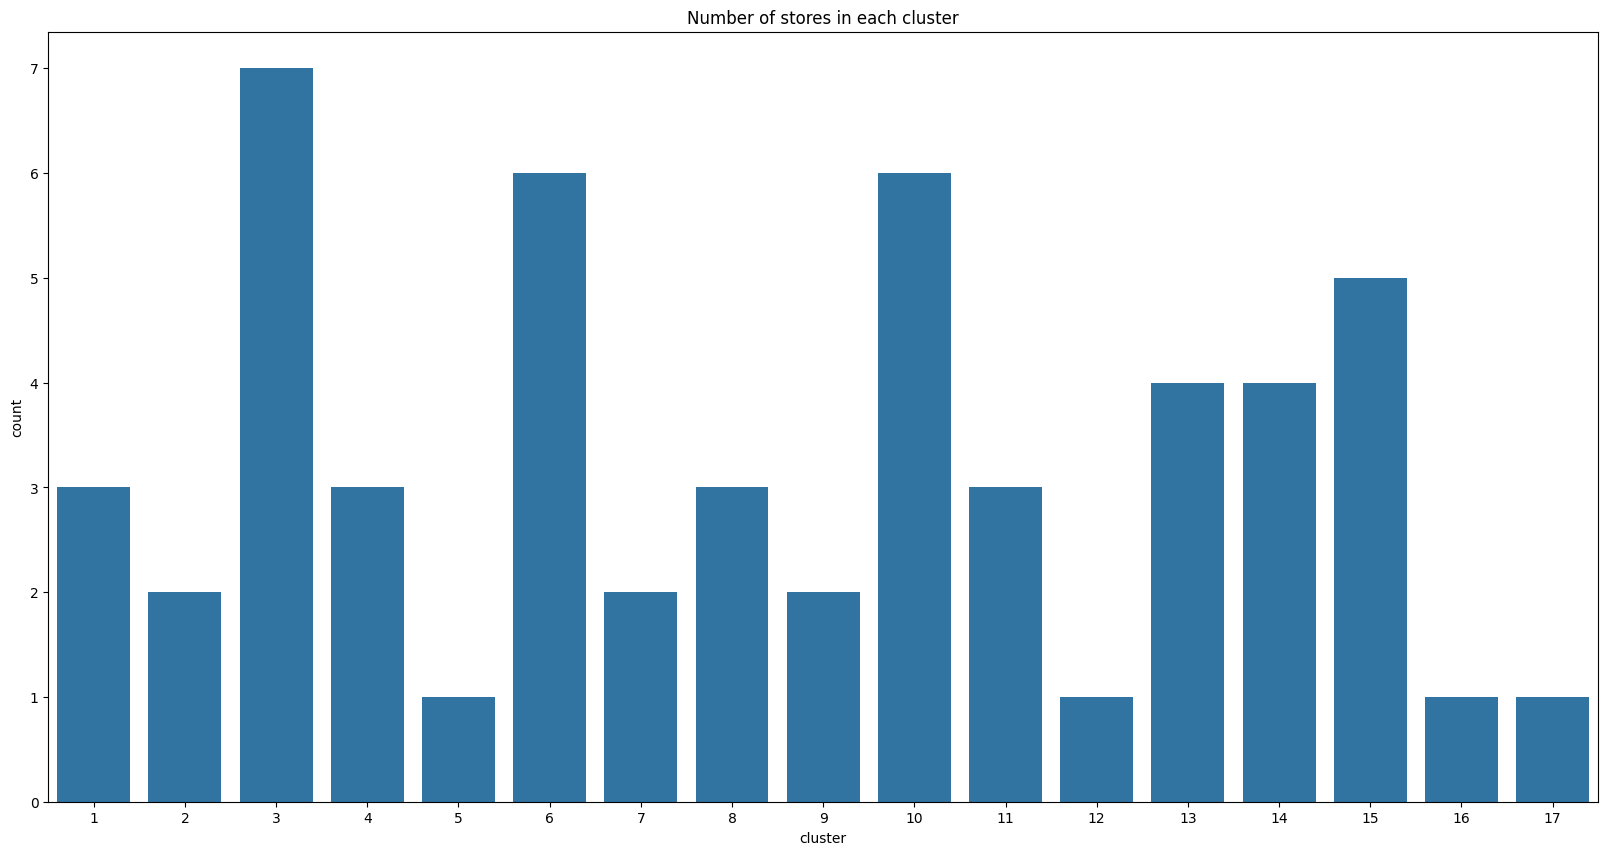

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(data= stores, x='cluster')
plt.title('Number of stores in each cluster')


Cluster 3 has highest number of store.

Text(0.5, 1.0, 'Number of stores in each type')

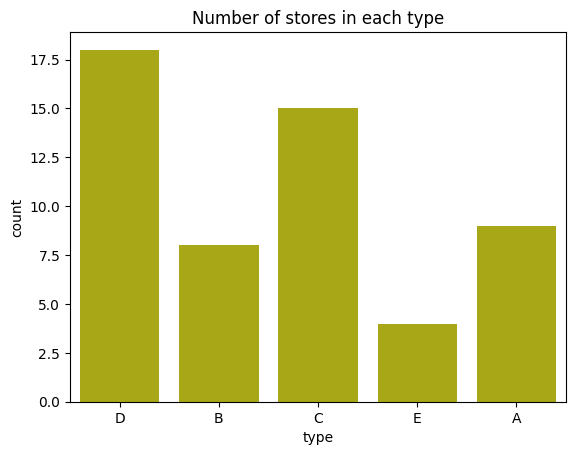

In [19]:
sns.countplot(data= stores, x='type', color='y')
plt.title('Number of stores in each type')

D type has highest number of stores and E type has least number of stores.

In [20]:
cluster = list(stores['cluster'].unique())
cluster.sort()

for i in cluster:
    x = stores[stores['cluster'] == i]
    x = pd.DataFrame(x)
    display(x)

,store_nbr,city,state,type,cluster
23,24,Guayaquil,Guayas,D,1
24,25,Salinas,Santa Elena,D,1
26,27,Daule,Guayas,D,1


,store_nbr,city,state,type,cluster
36,37,Cuenca,Azuay,D,2
41,42,Cuenca,Azuay,D,2


,store_nbr,city,state,type,cluster
15,16,Santo Domingo,Santo Domingo de los Tsachilas,C,3
29,30,Guayaquil,Guayas,C,3
31,32,Guayaquil,Guayas,C,3
32,33,Quevedo,Los Rios,C,3
34,35,Playas,Guayas,C,3
39,40,Machala,El Oro,C,3
53,54,El Carmen,Manabi,C,3


,store_nbr,city,state,type,cluster
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
37,38,Loja,Loja,D,4
40,41,Machala,El Oro,D,4


,store_nbr,city,state,type,cluster
43,44,Quito,Pichincha,A,5


,store_nbr,city,state,type,cluster
8,9,Quito,Pichincha,B,6
10,11,Cayambe,Pichincha,B,6
19,20,Quito,Pichincha,B,6
20,21,Santo Domingo,Santo Domingo de los Tsachilas,B,6
33,34,Guayaquil,Guayas,B,6
38,39,Cuenca,Azuay,B,6


,store_nbr,city,state,type,cluster
13,14,Riobamba,Chimborazo,C,7
21,22,Puyo,Pastaza,C,7


,store_nbr,city,state,type,cluster
2,3,Quito,Pichincha,D,8
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8


,store_nbr,city,state,type,cluster
3,4,Quito,Pichincha,D,9
22,23,Ambato,Tungurahua,D,9


,store_nbr,city,state,type,cluster
25,26,Guayaquil,Guayas,D,10
27,28,Guayaquil,Guayas,E,10
28,29,Guayaquil,Guayas,E,10
30,31,Babahoyo,Los Rios,B,10
35,36,Libertad,Guayas,E,10
42,43,Esmeraldas,Esmeraldas,E,10


,store_nbr,city,state,type,cluster
44,45,Quito,Pichincha,A,11
48,49,Quito,Pichincha,A,11
51,52,Manta,Manabi,A,11


,store_nbr,city,state,type,cluster
16,17,Quito,Pichincha,C,12


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
5,6,Quito,Pichincha,D,13
52,53,Manta,Manabi,D,13


,store_nbr,city,state,type,cluster
45,46,Quito,Pichincha,A,14
46,47,Quito,Pichincha,A,14
47,48,Quito,Pichincha,A,14
49,50,Ambato,Tungurahua,A,14


,store_nbr,city,state,type,cluster
9,10,Quito,Pichincha,C,15
11,12,Latacunga,Cotopaxi,C,15
12,13,Latacunga,Cotopaxi,C,15
14,15,Ibarra,Imbabura,C,15
18,19,Guaranda,Bolivar,C,15


,store_nbr,city,state,type,cluster
17,18,Quito,Pichincha,B,16


,store_nbr,city,state,type,cluster
50,51,Guayaquil,Guayas,A,17


Text(0.5, 1.0, 'No. of Stores in each Cluster separated by Type')

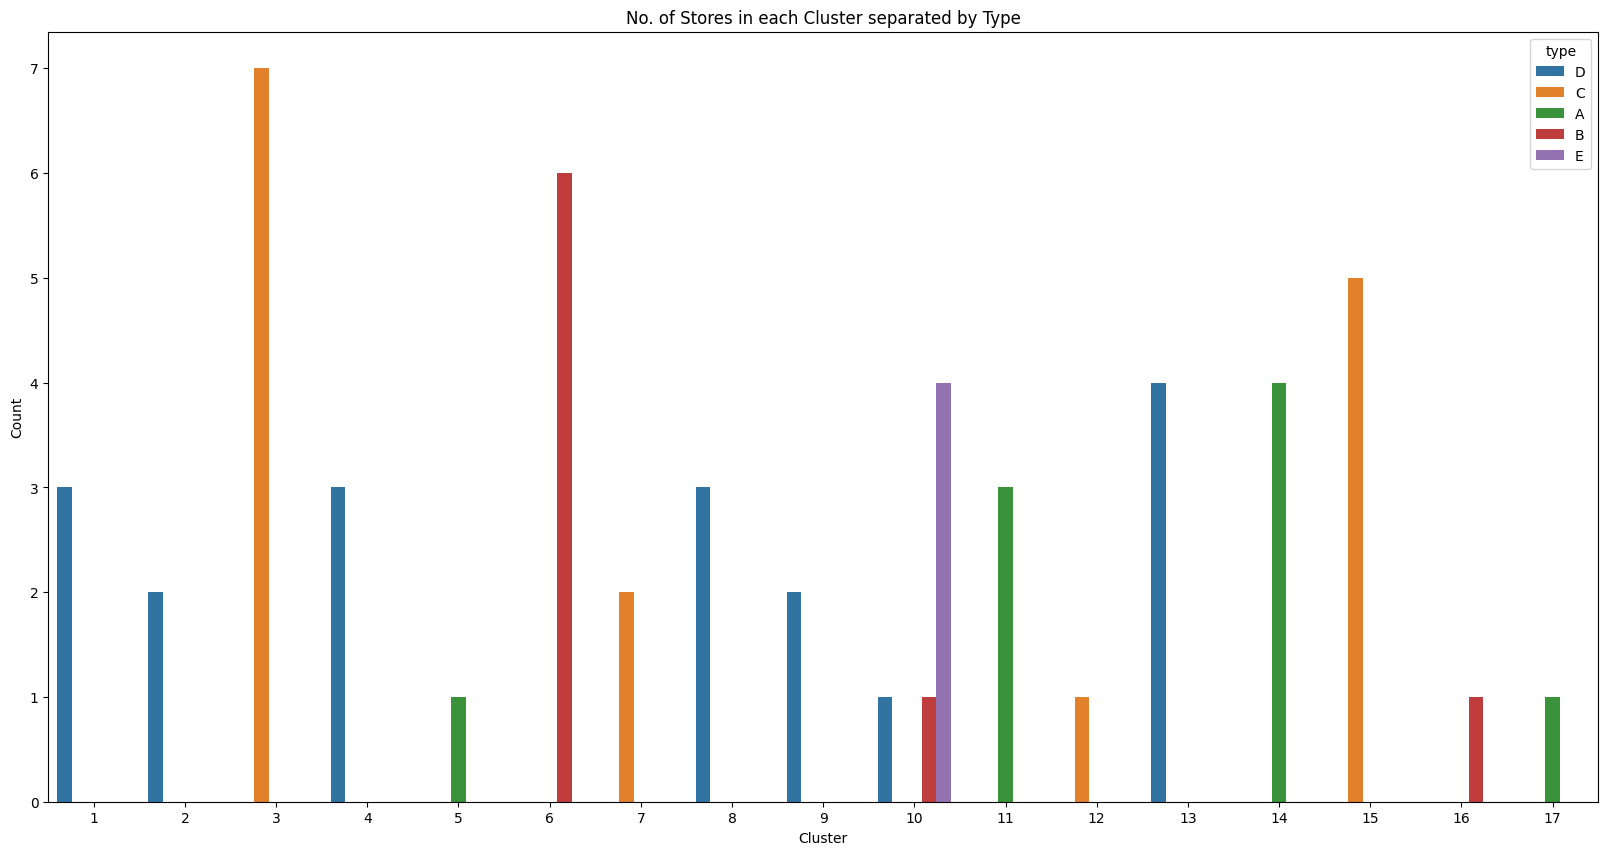

In [17]:
plt.figure(figsize=(20,10))
sns.countplot(data=stores, x='cluster', hue='type')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('No. of Stores in each Cluster separated by Type')

Each cluster have stores of same type except cluster 10.